# Protein Kenetic Stability Prediction 

# Life cycle of  Project

* **Understanding the Problem Statement**

* **Data Collection**

* **Data Checks to perform**

* **Exploratory data analysis**

* **Data Pre-Processing**

* **Model Training**

* **Cross validation**
* ****


# 1) Problem statement

# 2) Data Collection

## 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mutual_info_score


In [113]:
data = pd.read_csv('data/Final_labeled_data.csv')
data.head()

,PDB,No. a.a.,Glycine,S.S.,Long SS,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,...,No. Surf. neg.,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,SDS Stable
0,2H5C,198,32,3.0,2,8,7863.049316,14,13,1202.166504,...,4,246.944275,75,47,1929.952759,9.595960,52.525253,8,213,0
1,5JVI,316,36,0.0,N,-10,12592.415039,21,21,1708.759888,...,26,1090.533569,127,74,3567.560303,48.101266,17.405063,1,3,0
2,2V1F,153,15,0.0,N,0,8144.530273,21,21,1973.160889,...,21,1814.241211,61,49,1495.550049,87.581699,0.000000,1,1,1
3,1B9O,123,6,4.0,4,-8,7029.185059,13,13,1405.147583,...,21,1874.586426,46,36,1701.761353,43.089431,4.878049,6,140,1
4,2PWA,279,33,2.0,2,1,10385.035156,20,20,1764.792358,...,18,901.254578,107,55,2552.219971,32.258065,22.580645,1,3,0


In [114]:
data.columns

Index(['PDB', 'No. a.a.', 'Glycine', 'S.S.', 'Long SS', 'Charge', 'SASA',
       'No. pos.', 'No. Surf. pos.', 'Pos. area', 'No. neg.', 'No. Surf. neg.',
       'Neg. area', 'No. hyd.', 'No. Surf. hyd.', 'hyd. area', 'Alpha', 'Beta',
       'Salt bridges', 'H-bonds', 'SDS Stable'],
      dtype='object')

# Dataset Information

#### The meaning of the data Features in this dataset


* **PDB**: This stands for Protein Data Bank, a repository that stores 3D structural information of biological macromolecules, including proteins.

* **No. a.a.**: Number of amino acids in the protein. Amino acids are the building blocks of proteins.

* **Glycine**: The number of glycine residues in the protein. Glycine is one of the 20 standard amino acids.

* **no_ss.**: Secondary Structure. This parameter refers to the secondary structural elements present in the protein, such as alpha helices, beta sheets, turns, or coils.

* **Charge**: The overall net charge of the protein at a specific pH. Proteins can be positively charged (basic), negatively charged (acidic), or neutral, depending on the distribution of charged amino acids.

* **SASA**: Solvent Accessible Surface Area. It represents the surface area of the protein that is exposed to solvent molecules.

* **No. pos.**: Number of positively charged residues in the protein. Positively charged amino acids include lysine, arginine, and histidine.

* **No. Surf. pos.**: Number of positively charged residues on the protein's surface.

* **Pos. area**: The area of positively charged residues on the protein's surface.

* **No. neg.**: Number of negatively charged residues in the protein. Negatively charged amino acids include aspartic acid and glutamic acid.

* **No. Surf. neg.**: Number of negatively charged residues on the protein's surface.

* **Neg. area**: The area of negatively charged residues on the protein's surface.

* **No. hyd.**: Number of hydrophobic residues in the protein. Hydrophobic residues tend to be buried within the protein core away from the solvent.

* **No. Surf. hyd.**. hyd.: Number of hydrophobic residues on the protein's surface.

* **Hyd. area**: The area of hydrophobic residues on the protein's surface.

* **Sequence**: The area of hydrophobic residues on the protein's surface.
    
* **SDS Stable**: The area of hydrophobic residues on the protein's surface.


# 3. Data Checks to perform

* **Data Checks to perform**
* **Check Missing values**
* **Check Duplicates**
* **Check data type**
* **Check the number of unique values of each column**
* **Check statistics of data set**
#Check various categories present in the different categorical column

# 3.1 Check Missing values

In [115]:
data.isna().sum()

PDB               0
No. a.a.          0
Glycine           0
S.S.              0
Long SS           0
Charge            0
SASA              0
No. pos.          0
No. Surf. pos.    0
Pos. area         0
No. neg.          0
No. Surf. neg.    0
Neg. area         0
No. hyd.          0
No. Surf. hyd.    0
hyd. area         0
Alpha             0
Beta              0
Salt bridges      0
H-bonds           0
SDS Stable        0
dtype: int64

### There are no missing values in the data set

## 3.2 Check Duplicates

In [116]:
data.duplicated().sum()

0

### There are no duplicates values in the data set

# 3.3 Check data types

In [100]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PDB             51 non-null     object 
 1   No. a.a.        51 non-null     int64  
 2   Glycine         51 non-null     int64  
 3   S.S.            51 non-null     float64
 4   Long SS         51 non-null     object 
 5   Charge          51 non-null     int64  
 6   SASA            51 non-null     float64
 7   No. pos.        51 non-null     int64  
 8   No. Surf. pos.  51 non-null     int64  
 9   Pos. area       51 non-null     float64
 10  No. neg.        51 non-null     int64  
 11  No. Surf. neg.  51 non-null     int64  
 12  Neg. area       51 non-null     float64
 13  No. hyd.        51 non-null     int64  
 14  No. Surf. hyd.  51 non-null     int64  
 15  hyd. area       51 non-null     float64
 16  Alpha           51 non-null     float64
 17  Beta            51 non-null     float

# 3.4 Checking the number of unique values of each column

In [101]:
data.nunique()

PDB               51
No. a.a.          42
Glycine           34
S.S.               8
Long SS            8
Charge            24
SASA              51
No. pos.          30
No. Surf. pos.    28
Pos. area         50
No. neg.          36
No. Surf. neg.    33
Neg. area         51
No. hyd.          41
No. Surf. hyd.    41
hyd. area         51
Alpha             48
Beta              44
Salt bridges      27
H-bonds           45
SDS Stable         2
dtype: int64

# 3.5 Check statistics of data set

In [102]:
data.describe()


,No. a.a.,Glycine,S.S.,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,No. neg.,No. Surf. neg.,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,SDS Stable
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,259.470588,23.686275,1.666667,-3.313725,11699.407502,25.176471,24.45098,2271.074610,28.490196,26.803922,2000.600190,101.313725,66.764706,2844.034814,33.102761,23.354623,17.666667,268.725490,0.647059
std,165.400405,16.442007,2.840188,8.310211,6643.650076,17.872555,16.97918,1467.330731,21.942081,20.786553,1622.821666,67.658699,42.690321,1798.226329,23.528391,16.741672,19.217353,222.799738,0.482640
min,13.000000,1.000000,0.000000,-30.000000,1503.186768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,740.575989,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129.000000,12.000000,0.000000,-7.500000,7278.968994,14.000000,14.00000,1426.313782,13.000000,12.500000,856.516113,48.000000,36.500000,1656.464661,11.210762,10.093564,3.000000,128.500000,0.000000
50%,223.000000,22.000000,0.000000,-2.000000,9903.847656,20.000000,20.00000,1786.031494,21.000000,21.000000,1557.094360,84.000000,56.000000,2396.720703,33.904110,18.867925,10.000000,217.000000,1.000000
75%,325.500000,33.000000,3.000000,1.500000,13773.604980,33.500000,33.00000,2789.773193,36.500000,35.500000,2712.255615,133.500000,82.000000,3402.709839,46.317947,35.951702,25.000000,374.000000,1.000000
max,836.000000,79.000000,17.000000,12.000000,32777.738281,86.000000,82.00000,6816.470215,100.000000,98.000000,8587.200195,334.000000,211.000000,8527.205078,88.815789,55.932203,79.000000,985.000000,1.000000


# Checking the number of unique value in target column and their count

In [117]:
data['SDS Stable'].value_counts()

1    33
0    18
Name: SDS Stable, dtype: int64

# 3.7 Exploring Data

In [118]:
# drop PDB and Sequence(object datatypes) 
data = data.drop(columns=["PDB", "Long SS"])


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No. a.a.        51 non-null     int64  
 1   Glycine         51 non-null     int64  
 2   S.S.            51 non-null     float64
 3   Charge          51 non-null     int64  
 4   SASA            51 non-null     float64
 5   No. pos.        51 non-null     int64  
 6   No. Surf. pos.  51 non-null     int64  
 7   Pos. area       51 non-null     float64
 8   No. neg.        51 non-null     int64  
 9   No. Surf. neg.  51 non-null     int64  
 10  Neg. area       51 non-null     float64
 11  No. hyd.        51 non-null     int64  
 12  No. Surf. hyd.  51 non-null     int64  
 13  hyd. area       51 non-null     float64
 14  Alpha           51 non-null     float64
 15  Beta            51 non-null     float64
 16  Salt bridges    51 non-null     int64  
 17  H-bonds         51 non-null     int64

# Correlation Between features


(19.5, -0.5)

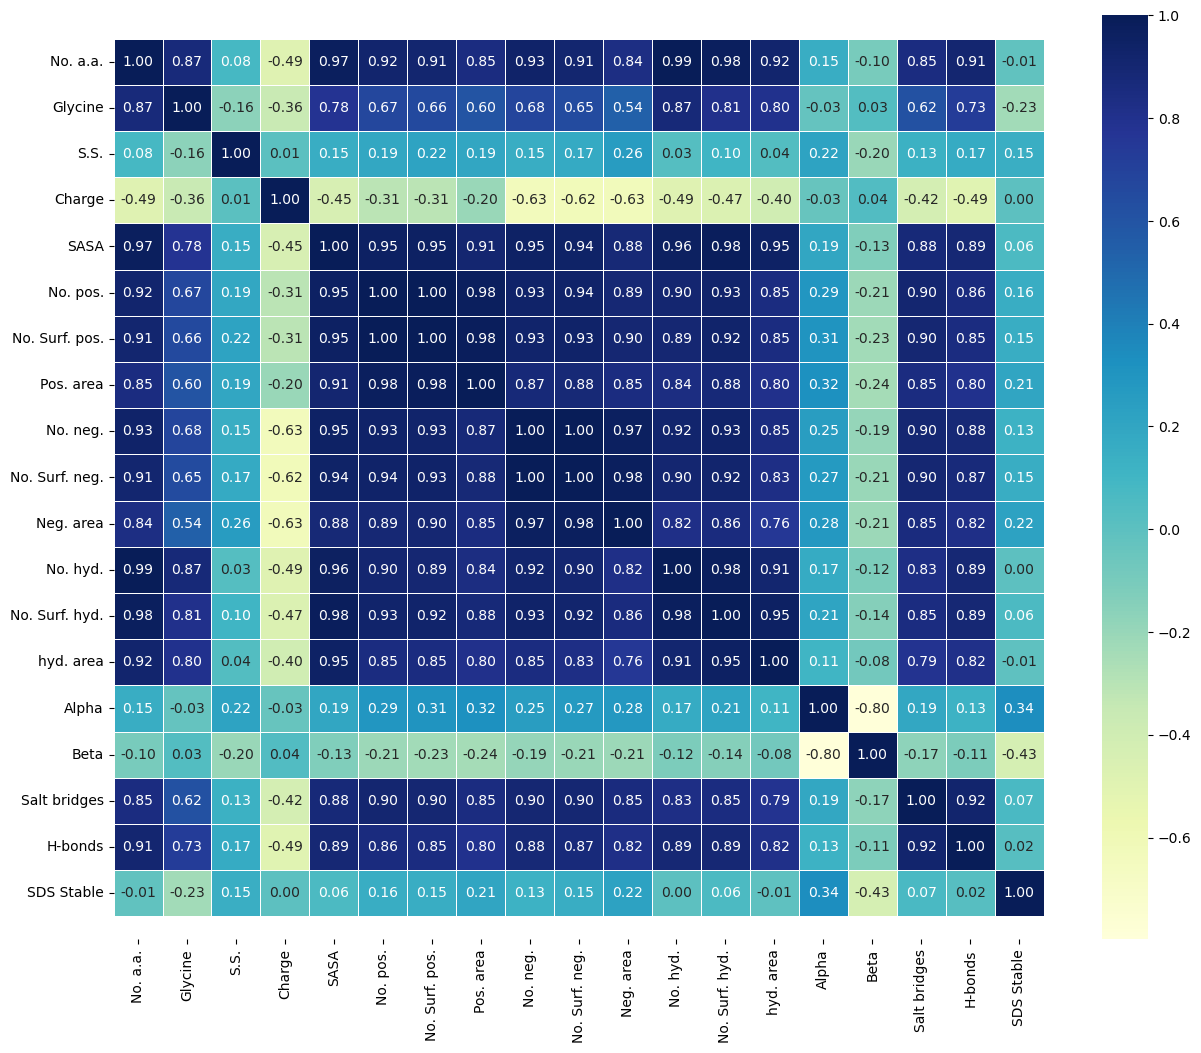

In [119]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
'No. pos.', 'No. Surf. pos.', 'No. neg.', 'No. Surf. neg.', 'SDS Stable', 'No. hyd.'

In [120]:
def calc_mi(series):
    return mutual_info_score(series, data['SDS Stable'])

# Apply the function to each feature
mi_scores = data.drop('SDS Stable', axis=1).apply(calc_mi)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Beta              0.649248
Alpha             0.649248
Pos. area         0.649248
Neg. area         0.649248
SASA              0.649248
hyd. area         0.649248
No. hyd.          0.622066
No. a.a.          0.594884
H-bonds           0.594884
No. neg.          0.475895
No. Surf. hyd.    0.465635
No. pos.          0.447356
Glycine           0.445116
No. Surf. neg.    0.389394
No. Surf. pos.    0.382731
Salt bridges      0.372472
Charge            0.302542
S.S.              0.166143
dtype: float64

In [ ]:
'No. pos.', 'No. Surf. pos.', 'No. neg.', 'No. Surf. neg.', 'SDS Stable

In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No. a.a.        51 non-null     int64  
 1   Glycine         51 non-null     int64  
 2   S.S.            51 non-null     float64
 3   Charge          51 non-null     int64  
 4   SASA            51 non-null     float64
 5   No. pos.        51 non-null     int64  
 6   No. Surf. pos.  51 non-null     int64  
 7   Pos. area       51 non-null     float64
 8   No. neg.        51 non-null     int64  
 9   No. Surf. neg.  51 non-null     int64  
 10  Neg. area       51 non-null     float64
 11  No. hyd.        51 non-null     int64  
 12  No. Surf. hyd.  51 non-null     int64  
 13  hyd. area       51 non-null     float64
 14  Alpha           51 non-null     float64
 15  Beta            51 non-null     float64
 16  Salt bridges    51 non-null     int64  
 17  H-bonds         51 non-null     int64

In [35]:


## Calculate the correlation matrix
#corr_matrix = data.corr()

#fig = plt.figure(figsize=(12, 6))
#sns.heatmap(corr_matrix, annot=True)
#plt.show()

# Visualize distribution with Histogram & KDE

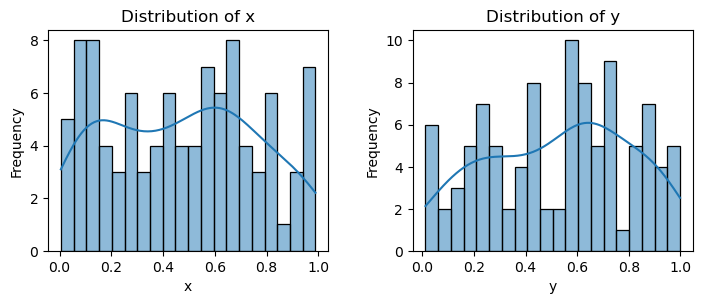

In [32]:
numeric_attributes = data.select_dtypes(include=['float64', 'int64']).columns

num_rows = 5
num_cols = 4

# Calculate the total number of subplots needed
num_subplots = num_rows * num_cols

# Create a grid of histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.tight_layout(pad=3.0)

# Loop through the numeric attributes and create histograms in the grid
for i, attribute in enumerate(numeric_attributes):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    sns.histplot(data[attribute], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Frequency')

# If there are unused subplot spaces, remove them
for i in range(len(numeric_attributes), num_subplots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

## Visualize distribution with Boxplot

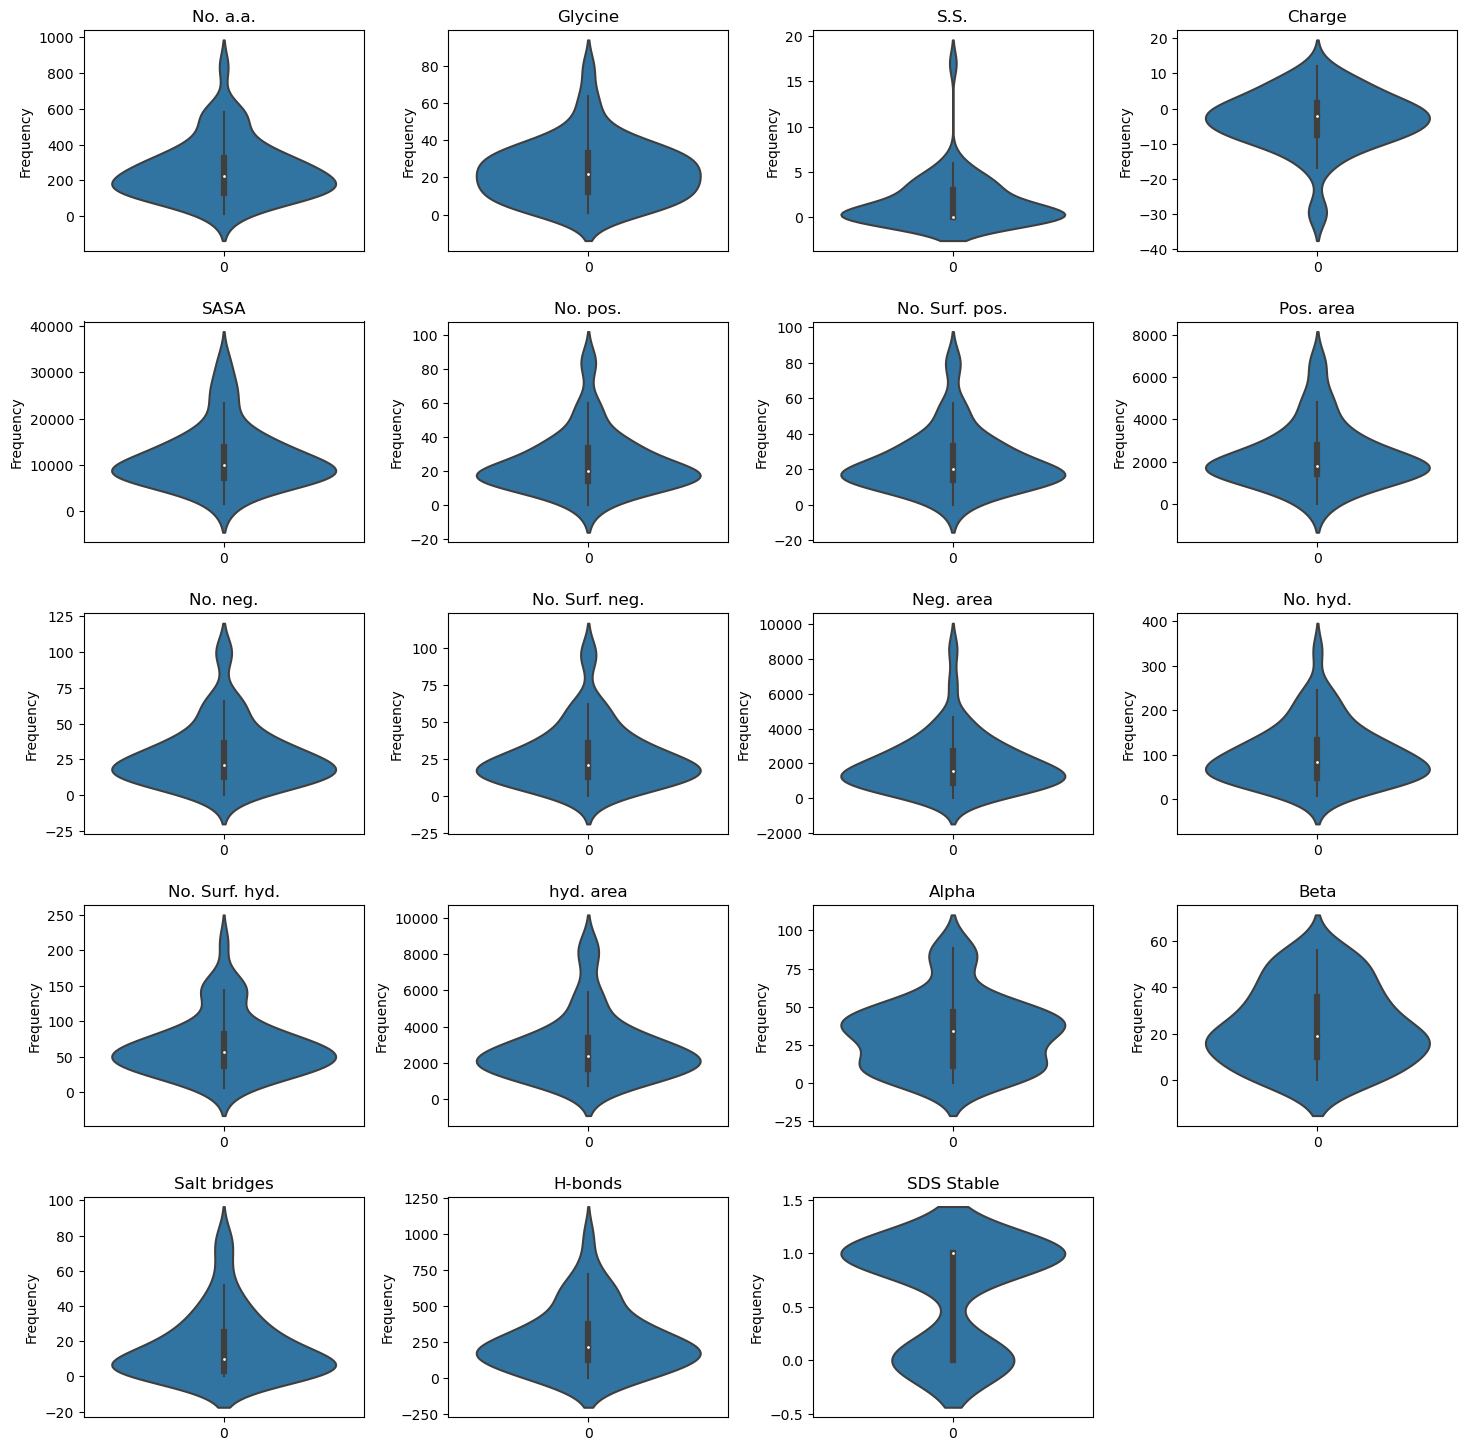

In [17]:
numeric_attributes = data.select_dtypes(include=['float64', 'int64']).columns

num_rows = 5
num_cols = 4

# Calculate the total number of subplots needed
num_subplots = num_rows * num_cols

#
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for i, attribute in enumerate(numeric_attributes):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    sns.violinplot(data=data[attribute], ax=ax)
    #   sns.boxplot(data=data[attribute], ax=ax)

    #ax.set_title(f'Distribution of {attribute}')
    ax.set_title(attribute)

    #ax.set_xlabel(attribute)
    ax.set_ylabel('Frequency')

# If there are unused subplot spaces, remove them
for i in range(len(numeric_attributes), num_subplots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

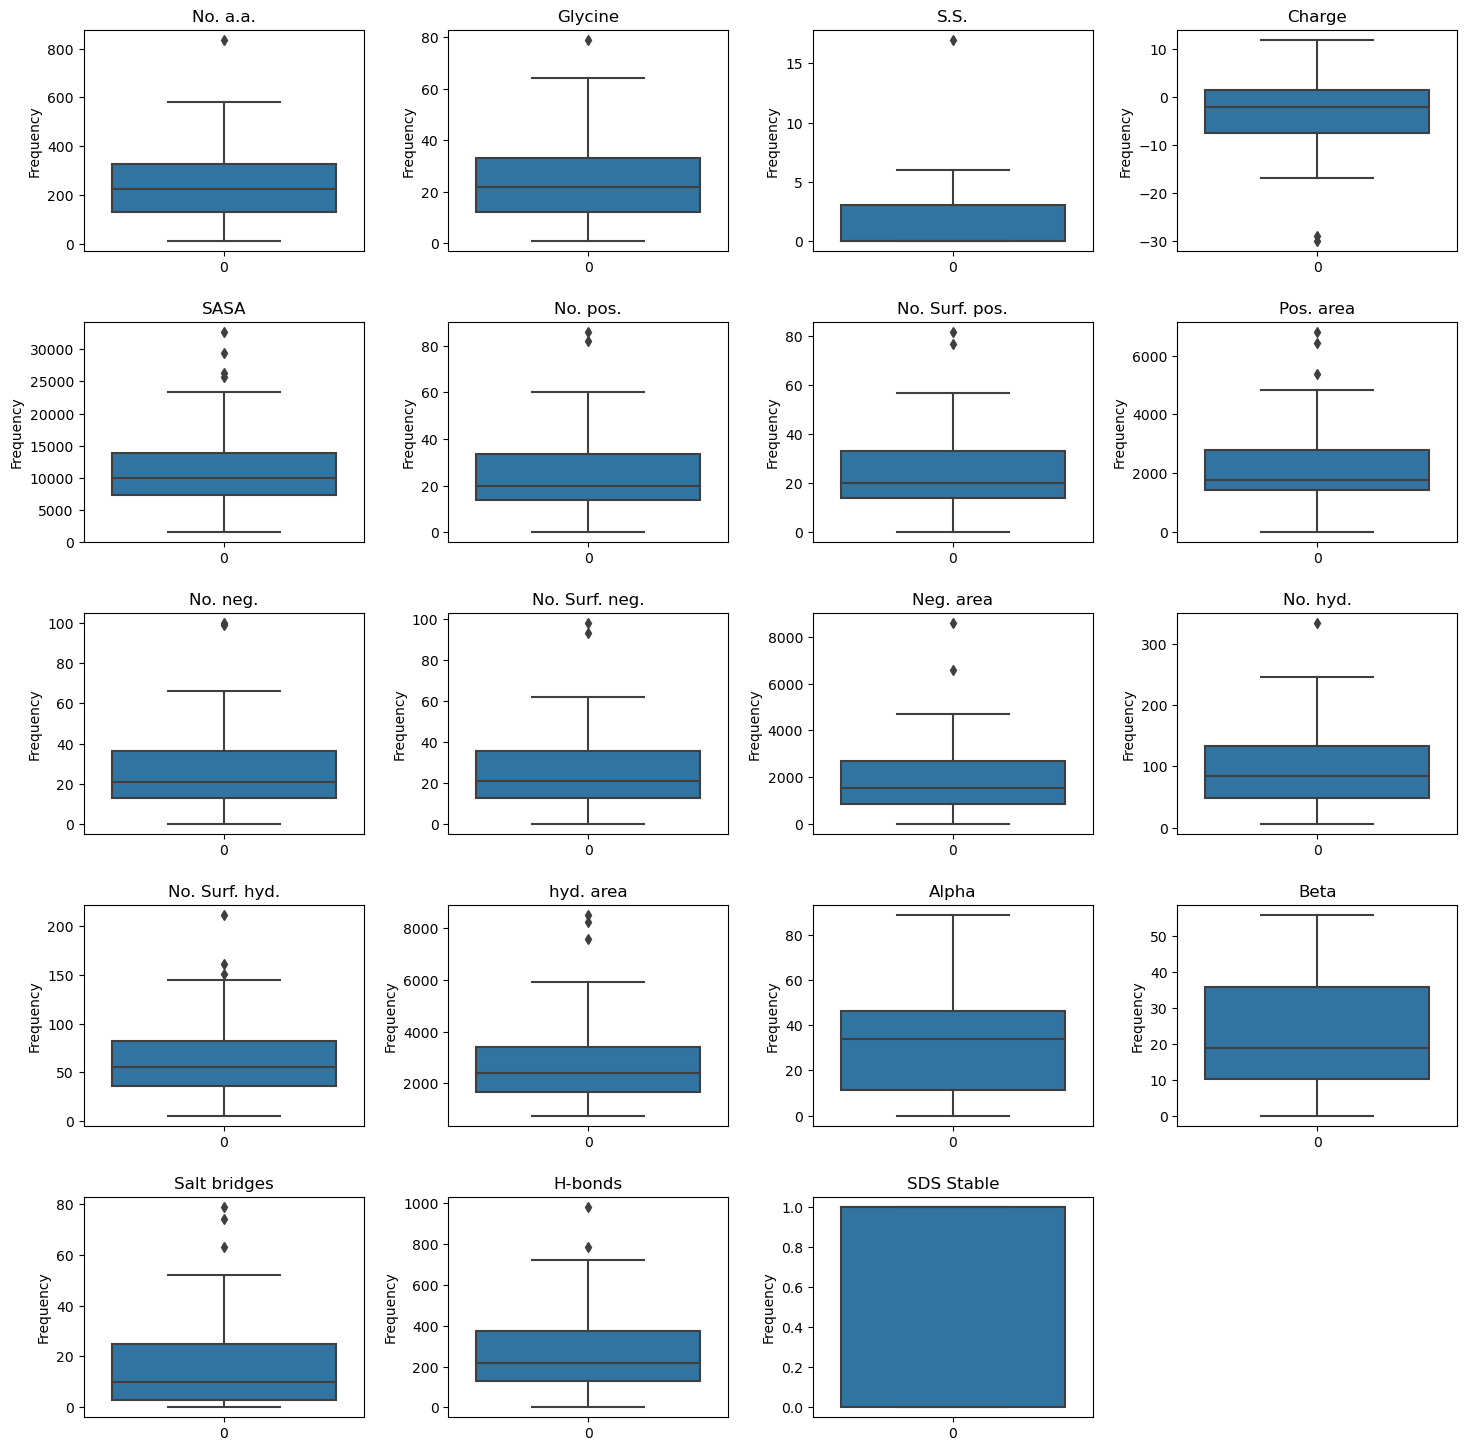

In [18]:
numeric_attributes = data.select_dtypes(include=['float64', 'int64']).columns

num_rows = 5
num_cols = 4

# Calculate the total number of subplots needed
num_subplots = num_rows * num_cols

#
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for i, attribute in enumerate(numeric_attributes):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    #sns.violinplot(data=data[attribute], ax=ax)
    sns.boxplot(data=data[attribute], ax=ax)

    #ax.set_title(f'Distribution of {attribute}')
    ax.set_title(attribute)

    #ax.set_xlabel(attribute)
    ax.set_ylabel('Frequency')

# If there are unused subplot spaces, remove them
for i in range(len(numeric_attributes), num_subplots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

No. a.a.: The boxplot shows a median value close to the lower quartile and right-skewed distribution. Some outliers on the upper side.

Glycine: The distribution is fairly symmetrical, with the median near the center of the box.

no. ss.: The median is near the upper quartile, have outliers.

Charge: Distribution appears to be right-skewed, with a few outliers on both the lower and upper ends.

SASA: The distribution has a median closer to the first quartile, said right-skewed distribution with several outliers.

No. pos.: There's a cluster of outliers above the upper whisker.

No. Surf. pos.: The distribution has a high median with outliers on the upper side.

Pos. area: The distribution seems fairly balanced, with outliers on the upper side.

No. neg.: The boxplot shows a right-skewed distribution with outliers on the upper side.

No. Surf. neg.: The distribution has a median that is closer to the third quartile, indicating a left-skewed distribution.

Neg. area: The distribution is skewed with outliers on the upper side.

No. hyd.:  The distribution has a median near the upper quartile, shows a left-skewed distribution with outliers.

No. Surf. hyd.: The median is near the center with some outlier.

Hyd. area: The distribution appears right-skewed with outliers above the upper whisker.

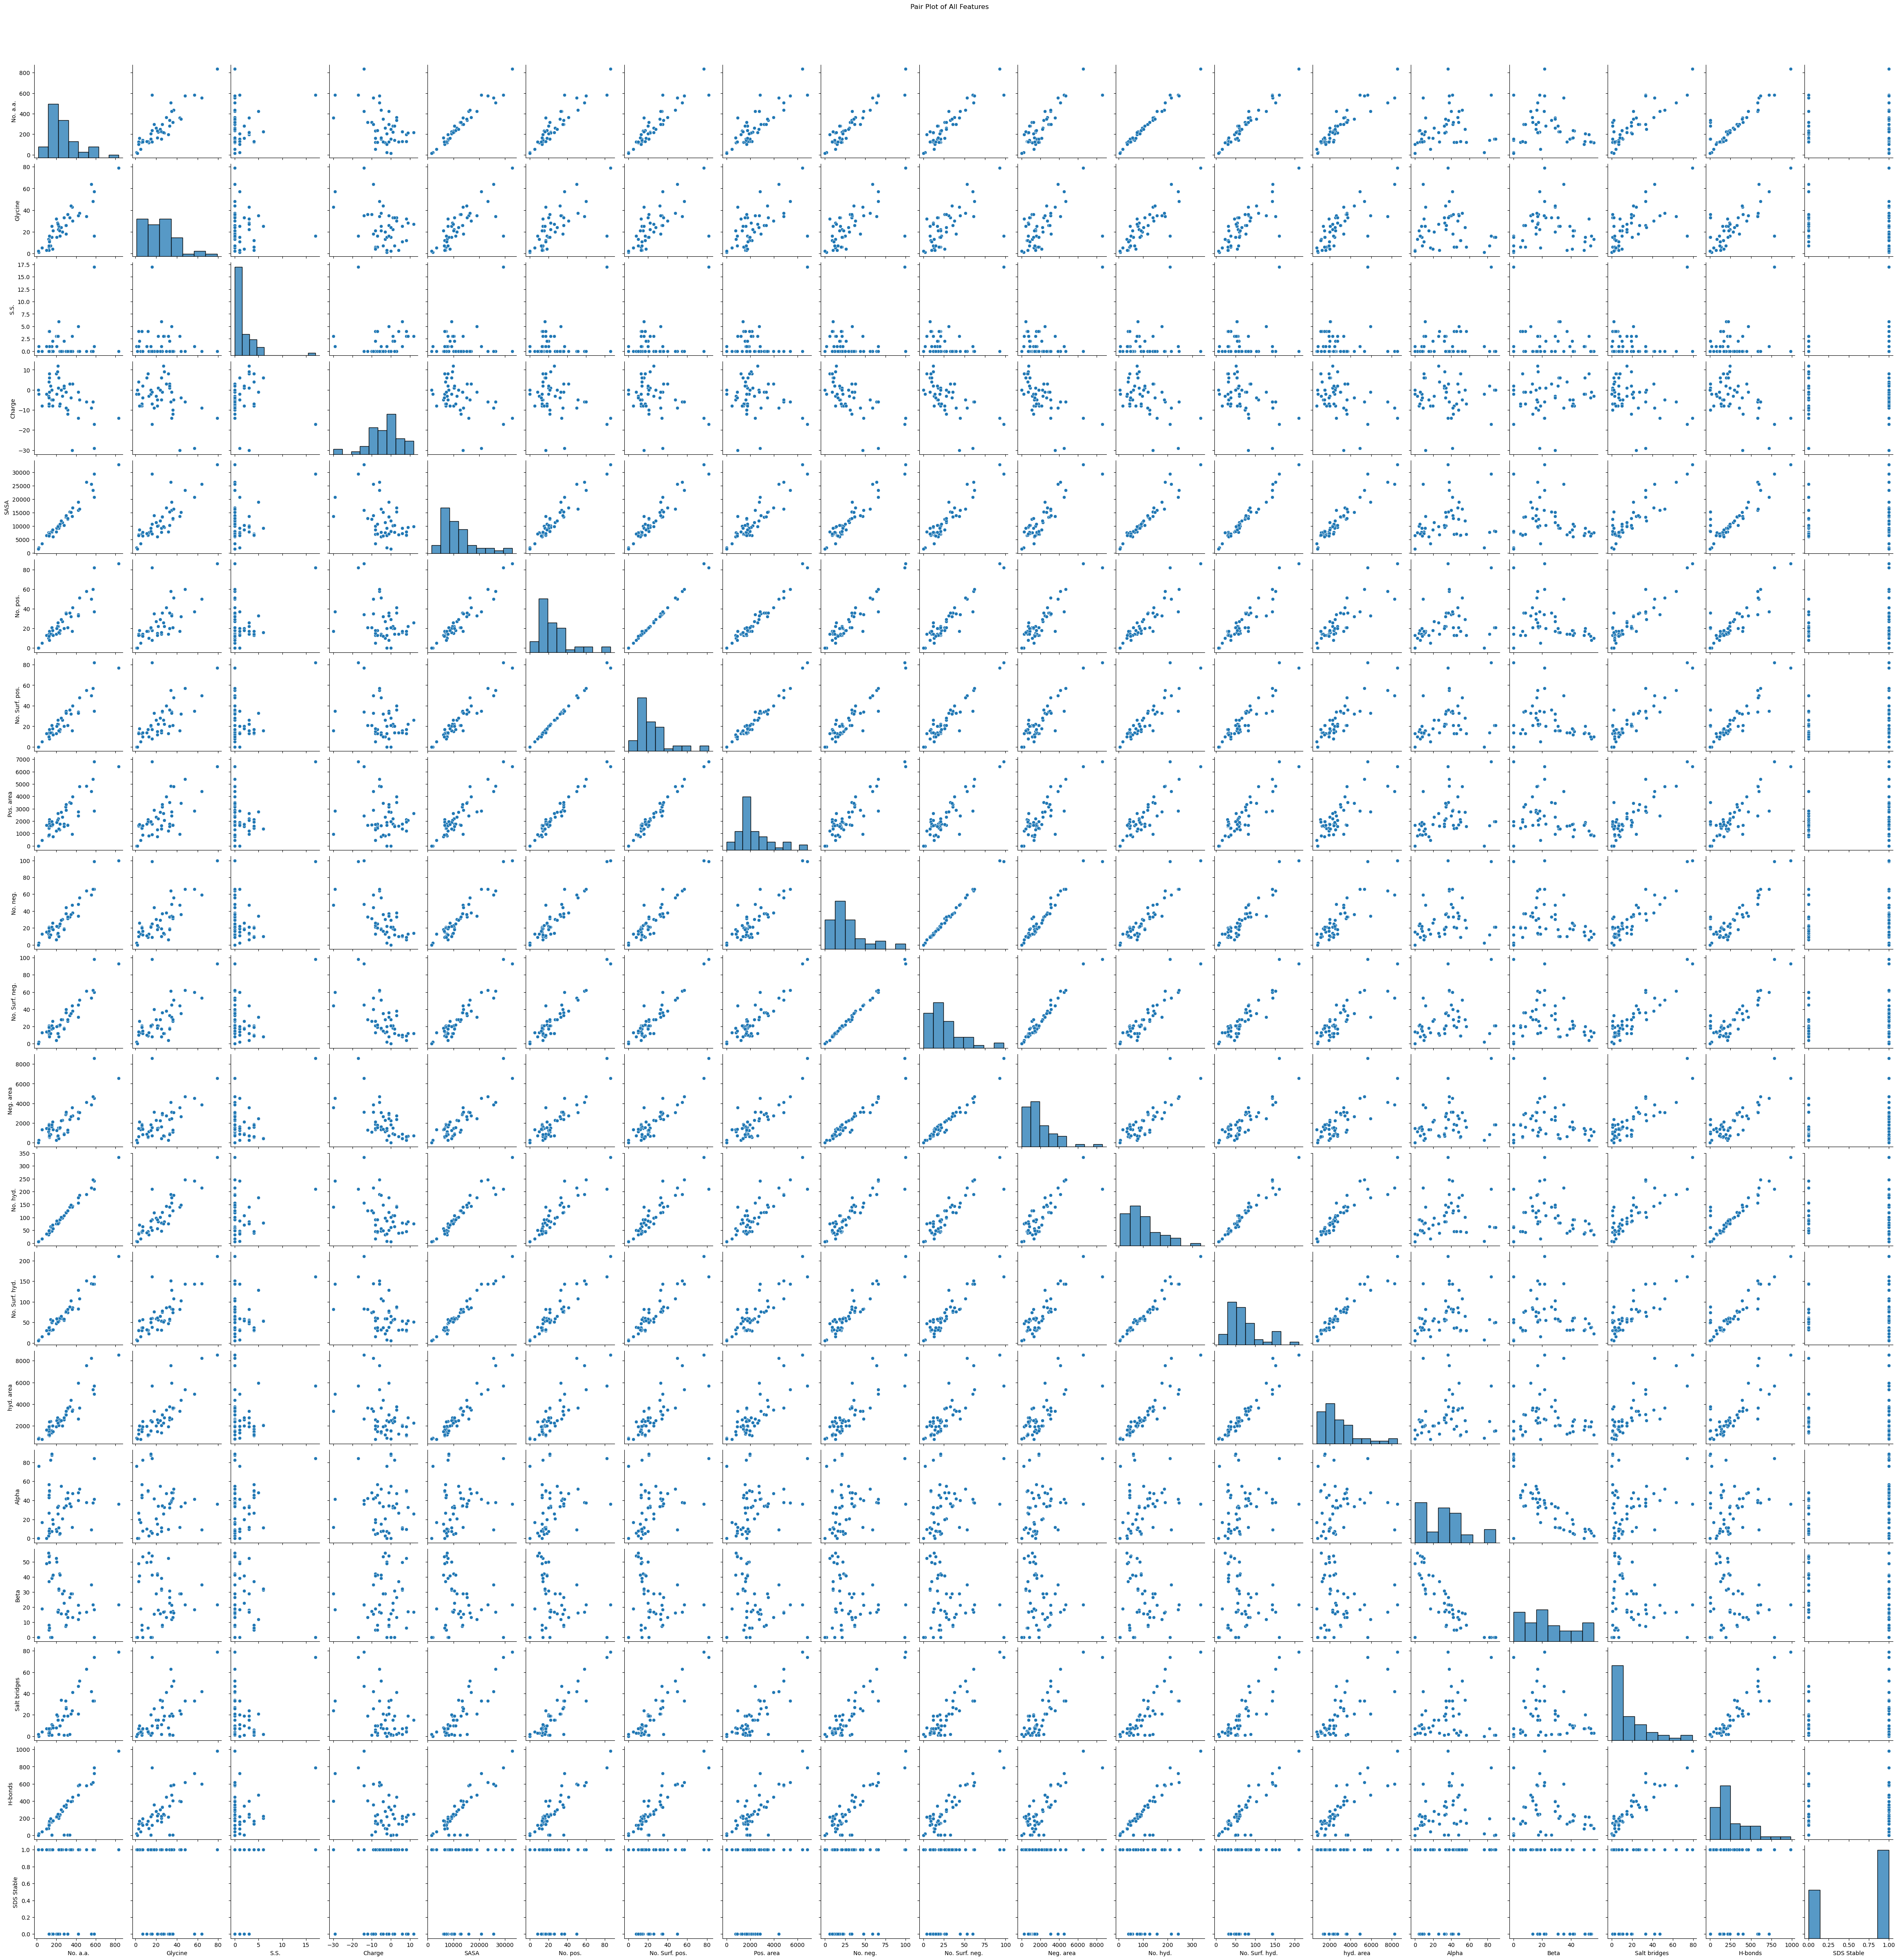

In [121]:
sns.pairplot(data)
plt.suptitle('Pair Plot of All Features', y=1.02) # Adjusts the top title to avoid overlap with plots
plt.show()

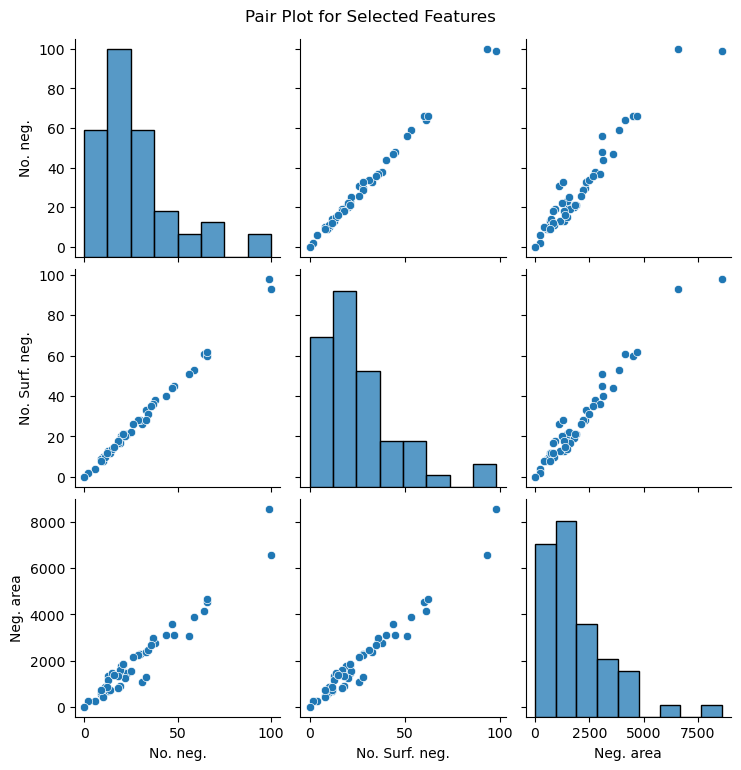

In [122]:
selected_features = ['No. neg.', 'No. Surf. neg.', 'Neg. area']
subset_data = data[selected_features]

# Create the pair plot
sns.pairplot(subset_data)
plt.suptitle('Pair Plot for Selected Features', y=1.02) 

plt.show()